In [43]:
%matplotlib inline

import io

import seaborn as sns

from bioservices import UniProt

import numpy as np
import h5py
import pandas as pd
import json
import os
import ast
from tqdm import tqdm
from keras.layers import Input, Dense, Dropout, LSTM, Flatten, GRU,TimeDistributed, Conv1D, Embedding
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras import layers
import keras
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, truncnorm, randint
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import RepeatedStratifiedKFold
from scipy.stats import loguniform
from pandas import read_csv
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Model, Sequential
from keras import regularizers
from sklearn.metrics import confusion_matrix, roc_curve

from tensorflow.keras.regularizers import l1
import matplotlib.pyplot as plt
from keras.preprocessing import text, sequence
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from Levenshtein import distance as lev



In [44]:
listLength = []
for x in list(membraneSeq.keys()):
    listLength.append(len(x))

In [45]:
membraneSeq = {}
for x in secondStructure.keys():
    down = secondStructure[x][0]
    up = secondStructure[x][1]
    print(x[down-1:up-1])

    membraneSeq[x] = x[down-1:up-1]


MDFNMKKLASDAGIFFTRAVQFTEEK
AGALTWLSCGSLCLLGCIAGCCF
GAGLLKMFNKATDAVSK
LGFFCCFMGCDLGCCLIPCL
AGALTWLSCGSLCLLGCVAGCCF
AGALTWLSCGSLCLLGCVAGCCF
EKLEDFFKNMVKSADGV
FGGFFKSVVKSADEVLF
MSLSGLRKQFNKANQYLSET
GAGILRMVNKAADAVNK
MNIMDFNVKKLAADAGTFLSRAVQFTEEK
GAGLLKMFNKATDAVSK
GAGLLKMFNKATDAVSK
FGGFFKSVVKSADEVLF
EKLEDFFKNMVKSADGV
FGGFFKSVVKSADEVLF
MNIMDFNVKKLAADAGTFLSRAVQFTEEK
MSVAGLKKQFYKASQLVSEK
MSVAGLKKQFHKASQLFSEK
GAGILRMVNKAADAVNK
MNIMDFNVKKLAADAGTFLSRAVQFTEEK
MSVAGLKKQFHKATQKVSEK
MDFNMKKLASDAGIFFTRAVQFTEEK
PGVAAVVACMMPFMLGFCFL
MSVAGLKKQFYKASQLVSEK
MSVAGLKKQFHKASQLFSEK
MSVAGLKKQFYKASQLVSEK
MSVAGLKKQFHKASQLFSEK
MSVAGLKKQFHKATQKVSEK
MSVAGLKKQFHKATQKVSEK
GAGLLKMFNKATDAVSK
FGGFFKSVVKSADEVLF
GAGLPKMFNKATDAVSK
GAGLLKMFNKATDAVSK
WLSCGGLFLLGCIAGCCLIP
GAGILRMVNKAADAVNK
MSVAGLKKQFYKASQLVSEK
MDFNMKKLASDAGIFFTRAVQFTEEK
MSVAGLKKQFHKASQLFSEK
LGFFCCFMGCDLGCCLIPCL
LVWLSCAGLAVFGCIYGCCL
LGFFCCFMGCDLGCCLIPCL
LGFFCCFMGCDLGCCLIPCL
MSVAGLKKQFYKASQLVSEK
MSVAGLKKQFHKATQKVSEK
LAWLSCGGLCLLGCIGGCCLIP
MNIMDFNVKKLAADAGTFLSRAV

In [60]:
for x in set(membraneSeq.values()):
    print(x)

GAGILRMVNKAADAVNK
MSVAGLKKQFYKASQLVSEK
MSWVVCTAITLACLPCCCIPFL
WLSCGGLFLLGCIAGCCLIP
EKLEDFFKNMVKSADGV
PGVAAVVACMMPFMLGFCFL
LAWLSCGGLCLLGCIGGCCLIP
FLLCCFCCFVGCDLGCCLIPCI
MSVAGLKKQFHKASQLFSEK
MNIMDFNVKKLAADAGTFLSRAVQFTEEK
MDFNMKKLASDAGIFFTRAVQFTEEK
AGALTWLSCGSLCLLGCVAGCCF
MVWLVCVLLIIFGCWLGCCL
MNIMDFNMKKLAADAGTFLSRAVQFTEEK
GAGLLKMFNKATDAVSK
FGGFFKSVVKSADEVLF
MDFNVKKLASDAGVFFSRAMQFTEEK
AGALTWLSCGSLCLLGCIAGCCF
GAGLPKMFNKATDAVSK
LGFFCCFMGCDLGCCLIPCL
LVWLSCAGLAVFGCIYGCCL
PGALTWLLCTTLFLFGYVLGCCF
MSVAGLKKQFHKATQKVSEK
MSLSGLRKQFNKANQYLSET


In [48]:
lengths = []
for x in membraneSeq.values():
    print(x)
    lengths.append(len(x))

MDFNMKKLASDAGIFFTRAVQFTEEK
AGALTWLSCGSLCLLGCIAGCCF
GAGLLKMFNKATDAVSK
LGFFCCFMGCDLGCCLIPCL
AGALTWLSCGSLCLLGCVAGCCF
AGALTWLSCGSLCLLGCVAGCCF
EKLEDFFKNMVKSADGV
FGGFFKSVVKSADEVLF
MSLSGLRKQFNKANQYLSET
GAGILRMVNKAADAVNK
MNIMDFNVKKLAADAGTFLSRAVQFTEEK
GAGLLKMFNKATDAVSK
GAGLLKMFNKATDAVSK
FGGFFKSVVKSADEVLF
EKLEDFFKNMVKSADGV
FGGFFKSVVKSADEVLF
MNIMDFNVKKLAADAGTFLSRAVQFTEEK
MSVAGLKKQFYKASQLVSEK
MSVAGLKKQFHKASQLFSEK
GAGILRMVNKAADAVNK
MNIMDFNVKKLAADAGTFLSRAVQFTEEK
MSVAGLKKQFHKATQKVSEK
MDFNMKKLASDAGIFFTRAVQFTEEK
PGVAAVVACMMPFMLGFCFL
MSVAGLKKQFYKASQLVSEK
MSVAGLKKQFHKASQLFSEK
MSVAGLKKQFYKASQLVSEK
MSVAGLKKQFHKASQLFSEK
MSVAGLKKQFHKATQKVSEK
MSVAGLKKQFHKATQKVSEK
GAGLLKMFNKATDAVSK
FGGFFKSVVKSADEVLF
GAGLPKMFNKATDAVSK
GAGLLKMFNKATDAVSK
WLSCGGLFLLGCIAGCCLIP
GAGILRMVNKAADAVNK
MSVAGLKKQFYKASQLVSEK
MDFNMKKLASDAGIFFTRAVQFTEEK
MSVAGLKKQFHKASQLFSEK
LGFFCCFMGCDLGCCLIPCL
LVWLSCAGLAVFGCIYGCCL
LGFFCCFMGCDLGCCLIPCL
LGFFCCFMGCDLGCCLIPCL
MSVAGLKKQFYKASQLVSEK
MSVAGLKKQFHKATQKVSEK
LAWLSCGGLCLLGCIGGCCLIP
MNIMDFNVKKLAADAGTFLSRAV

(array([18.,  0., 22.,  0.,  4.,  4.,  0.,  5.,  0.,  5.]),
 array([17. , 18.2, 19.4, 20.6, 21.8, 23. , 24.2, 25.4, 26.6, 27.8, 29. ]),
 <BarContainer object of 10 artists>)

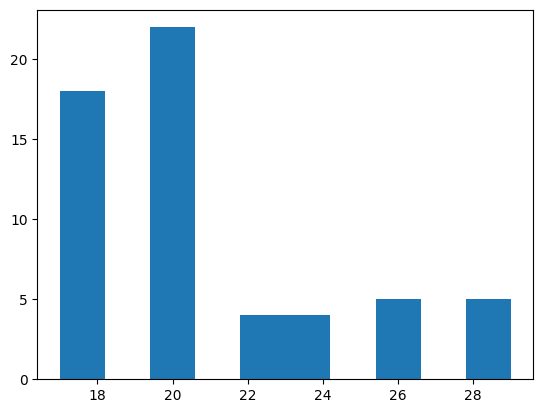

In [49]:
plt.hist(lengths)

In [50]:
np.mean(lengths)

20.70689655172414

In [51]:
similarity = []
for x in range(len(list(membraneSeq.keys()))):
    for y in range(len(list(membraneSeq.keys()))):
        g = list(membraneSeq.keys())
        if x != y:
            similarity.append(lev(g[x],g[y]))
            

In [52]:
service = UniProt()


In [53]:
df = service.get_df('ft_region:"membrane-binding amphipathic helix"', limit=None)


In [54]:
j = df.loc[df['Entry'] == 'Q99732']['Region'].values


In [55]:
for x in j: 
    print(x)

REGION 1..22; /note="Disordered"; /evidence="ECO:0000256|SAM:MobiDB-lite"; REGION 111..134; /note="Membrane-binding amphipathic helix"; /evidence="ECO:0000269|PubMed:27927196"


In [56]:
print(j[0].split('Reg'))

['REGION 1..22; /note="Disordered"; /evidence="ECO:0000256|SAM:MobiDB-lite"; REGION 111..134; /note="Membrane-binding amphipathic helix"; /evidence="ECO:0000269|PubMed:27927196"']


In [28]:
x = j[0].split('REGION')

In [29]:
x

['',
 ' 1..22; /note="Disordered"; /evidence="ECO:0000256|SAM:MobiDB-lite"; ',
 ' 111..134; /note="Membrane-binding amphipathic helix"; /evidence="ECO:0000269|PubMed:27927196"']

In [30]:
range1 = []
range2 = []
for y in df['Region']:
    z = y.split('REGION')
    for x in z:
        if "Membrane-binding amphipathic helix" in x:
            x = x[0:25]
            x = x.split('..')
            x[0]="".join(c for c in x[0] if  c.isdecimal())
            x[1] ="".join(c for c in x[1] if  c.isdecimal())
            range1.append(int(x[0]))
            range2.append(int(x[1]))

In [31]:
secondStructure = {}
num = 0 
for x in df['Sequence']:
    secondStructure[x] = [range1[num],range2[num]]
    num = num + 1

In [33]:
label = {}
for x in secondStructure.keys():

    labels = np.zeros(len(x))
    for y in range(secondStructure[x][0], secondStructure[x][1]):
        labels[y-1] = 1
    label[x] = labels

In [34]:
labelSeq = {}
for x in label.keys():
    targetString = ''
    for y in label[x]:
        if y == 1:
            targetString = targetString + 'A'
        elif y == 0:
            targetString = targetString + 'C'
    labelSeq[x] = targetString

In [35]:
labelSeq.keys()

dict_keys(['MDFNMKKLASDAGIFFTRAVQFTEEKFGQAEKTELDAHFENLLARADSTKNWTEKILRQTEVLLQPNPSARVEEFLYEKLDRKVPSRVTNGELLAQYMADAASELGPTTPYGKTLIKVAEAEKQLGAAERDFIHTASISFLTPLRNFLEGDWKTISKERRLLQNRRLDLDACKARLKKAKAAEAKATTVPDFQETRPRNYILSASASALWNDEVDKAEQELRVAQTEFDRQAEVTRLLLEGISSTHVNHLRCLHEFVKSQTTYYAQCYRHMLDLQKQLGRFPGTFVGTTEPASPPLSSTSPTTAAATMPVVPSVASLAPPGEASLCLEEVAPPASGTRKARVLYDYEAADSSELALLADELITVYSLPGMDPDWLIGERGNKKGKVPVTYLELLS', 'MSVPGPYQAATGPSSAPSAPPSYEETVAVNSYYPTPPAPMPGPTTGLVTGPDGKGMNPPSYYTQPAPIPNNNPITVQTVYVQHPITFLDRPIQMCCPSCNKMIVSQLSYNAGALTWLSCGSLCLLGCIAGCCFIPFCVDALQDVDHYCPNCRALLGTYKRL', 'MASGGGGCSASERLPPPFPGLEPESEGAAGGSEPEAGDSDTEGEDIFTGAAVVSKHQSPKITTSLLPINNGSKENGIHEEQDQEPQDLFADATVELSLDSTQNNQKKVLAKTLISLPPQEATNSSKPQPTYEELEEEEQEDQFDLTVGITDPEKIGDGMNAYVAYKVTTQTSLPLFRSKQFAVKRRFSDFLGLYEKLSEKHSQNGFIVPPPPEKSLIGMTKVKVGKEDSSSAEFLEKRRAALERYLQRIVNHPTMLQDPDVREFLEKEELPRAVGTQTLSGAGLLKMFNKATDAVSKMTIKMNESDIWFEEKLQEVECEEQRLRKLHAVVETLVNHRKELALNTAQFAKSLAMLGSSEDNTALSRALSQLAEVEEKIEQLHQEQANNDFFLLAELLSDYIRLLAIVRAAFDQRMKTWQRWQDAQ

In [36]:
def seq2ngrams(seqs, n=20):
    return np.array([[seq[i:i+n] for i in range(len(seq))] for seq in seqs])

In [37]:
input_seqs = labelSeq.keys()
input_grams = seq2ngrams(input_seqs)

/var/folders/zj/988sh2h5501gdntnynlhn0480000gn/T/ipykernel_139/1206861493.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([[seq[i:i+n] for i in range(len(seq))] for seq in seqs])


In [38]:
target_seqs = list(labelSeq.values())

In [39]:
maxlen_seq = 600

In [40]:
tokenizer_encoder = Tokenizer()
tokenizer_encoder.fit_on_texts(input_grams)
input_data = tokenizer_encoder.texts_to_sequences(input_grams)
input_data = sequence.pad_sequences(input_data, maxlen=maxlen_seq, padding='post')

tokenizer_decoder = Tokenizer(char_level=True)
tokenizer_decoder.fit_on_texts(target_seqs)
target_data = tokenizer_decoder.texts_to_sequences(target_seqs)
target_data = sequence.pad_sequences(target_data, maxlen=maxlen_seq, padding='post')
target_data = to_categorical(target_data)
input_data.shape, target_data.shape

((58, 600), (58, 600, 3))

In [41]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.3):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [42]:
n_words = len(tokenizer_encoder.word_index) + 1
n_tags = len(tokenizer_decoder.word_index) + 1
output_dim = 16
input = Input(shape=(maxlen_seq,))

x = Embedding(input_dim=n_words, output_dim=output_dim, input_length=maxlen_seq)(input)
x = TransformerBlock(output_dim,4,128)(x)
x = Dropout(0.5)(x)



x = Dense(254)(x)
x = Dense(128)(x)
x = Dense(n_tags, activation="softmax")(x)
model = Model(input, x)
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 600)]             0         
                                                                 
 embedding (Embedding)       (None, 600, 16)           168448    
                                                                 
 transformer_block (Transfor  (None, 600, 16)          8608      
 merBlock)                                                       
                                                                 
 dropout_2 (Dropout)         (None, 600, 16)           0         
                                                                 
 dense_2 (Dense)             (None, 600, 254)          4318      
                                                                 
 dense_3 (Dense)             (None, 600, 128)          32640     
                                                             

In [371]:
adam = Adam(lr = 0.001)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'AUC', 'Precision', 'Recall'])

In [372]:
X_train, X_test, y_train, y_test = train_test_split(input_data,target_data, test_size = 0.05, random_state = 42)


In [373]:
history = model.fit(X_train.astype('float64'), y_train.astype('float64'), batch_size = 30, epochs = 20, 
                    validation_split = 0.15, shuffle = True, callbacks = None,
                    use_multiprocessing=True, workers=4)

Epoch 1/20
2/2 [==============================] - 1s 403ms/step - loss: 0.8212 - accuracy: 0.6271 - auc: 0.8084 - precision: 0.7146 - recall: 0.4967 - val_loss: 0.3358 - val_accuracy: 0.9076 - val_auc: 0.9802 - val_precision: 0.9372 - val_recall: 0.8591
Epoch 2/20
2/2 [==============================] - 0s 133ms/step - loss: 0.4633 - accuracy: 0.8395 - auc: 0.9491 - precision: 0.8891 - recall: 0.7753 - val_loss: 0.1902 - val_accuracy: 0.9552 - val_auc: 0.9884 - val_precision: 0.9602 - val_recall: 0.9483
Epoch 3/20
2/2 [==============================] - 0s 130ms/step - loss: 0.3346 - accuracy: 0.8988 - auc: 0.9692 - precision: 0.9212 - recall: 0.8714 - val_loss: 0.1595 - val_accuracy: 0.9630 - val_auc: 0.9894 - val_precision: 0.9640 - val_recall: 0.9617
Epoch 4/20
2/2 [==============================] - 0s 136ms/step - loss: 0.2739 - accuracy: 0.9263 - auc: 0.9755 - precision: 0.9374 - recall: 0.9118 - val_loss: 0.1599 - val_accuracy: 0.9641 - val_auc: 0.9900 - val_precision: 0.9642 - val

In [374]:
def makeRoc(features_val, labels_val, labels, model, outputDir='', outputSuffix=''):
    from sklearn.metrics import roc_curve, auc
    labels_pred = model.predict(features_val)
    df = pd.DataFrame()
    fpr = {}
    tpr = {}
    auc1 = {}
    plt.figure(figsize=(10,8))       
    for i, label in enumerate(labels):
        df[label] = labels_val[:,:,i].reshape(y_test.shape[0]*600)
        df[label + '_pred'] = labels_pred[:,:,i].reshape(y_test.shape[0]*600)
        fpr[label], tpr[label], threshold = roc_curve(df[label],df[label+'_pred'])
        auc1[label] = auc(fpr[label], tpr[label])
        plt.plot(fpr[label],tpr[label],label='%s tagger, AUC = %.1f%%'%(label.replace('j_',''),auc1[label]*100.))
    plt.plot([0, 1], [0, 1], lw=1, color='black', linestyle='--')
    #plt.semilogy()
    plt.xlabel("Background Efficiency")
    plt.ylabel("Signal Efficiency")
    plt.xlim([-0.05, 1.05])
    plt.ylim(0.001,1.05)
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.figtext(0.25, 0.90,'Transformer ROC Curve',fontweight='bold', wrap=True, horizontalalignment='right', fontsize=14)
    #plt.figtext(0.35, 0.90,'preliminary', style='italic', wrap=True, horizontalalignment='center', fontsize=14) 
    #plt.savefig('%sROC_%s.pdf'%(outputDir, outputSuffix))
    return labels_pred

In [375]:
def learningCurve(history):
    plt.figure(figsize=(10,8))
    plt.plot(history.history['loss'], linewidth=1)
    plt.plot(history.history['val_loss'], linewidth=1)
    plt.title('Model Loss over Epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['training sample loss','validation sample loss'])
    #plt.savefig('Learning_curve.pdf')
    plt.show()
    plt.close()

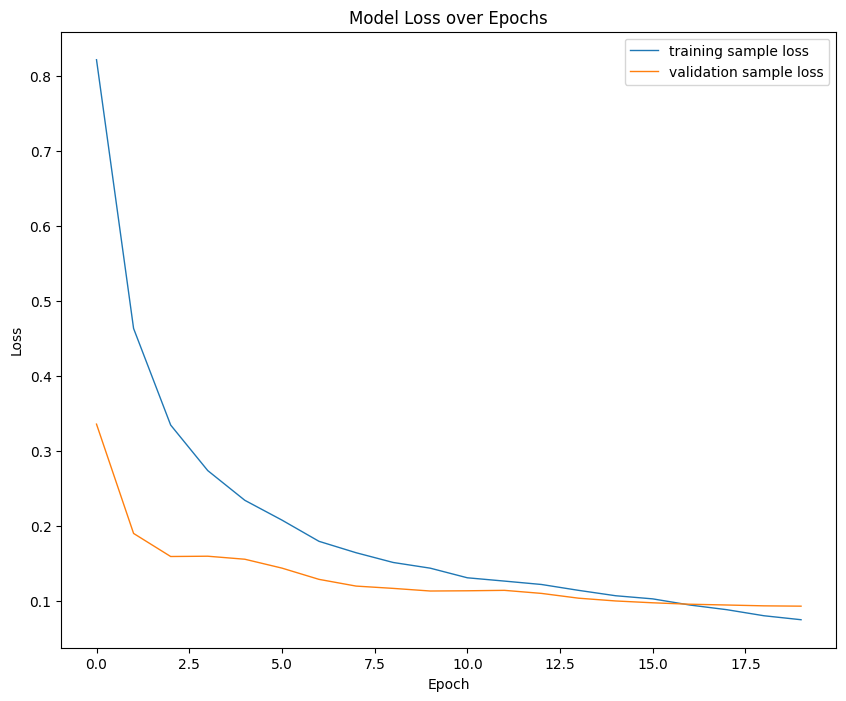

In [376]:
learningCurve(history)

In [377]:
labels = ['Not in Sequence', 'Not Membrane Binding', 'Amphipathic Membrane-Binding Helix']

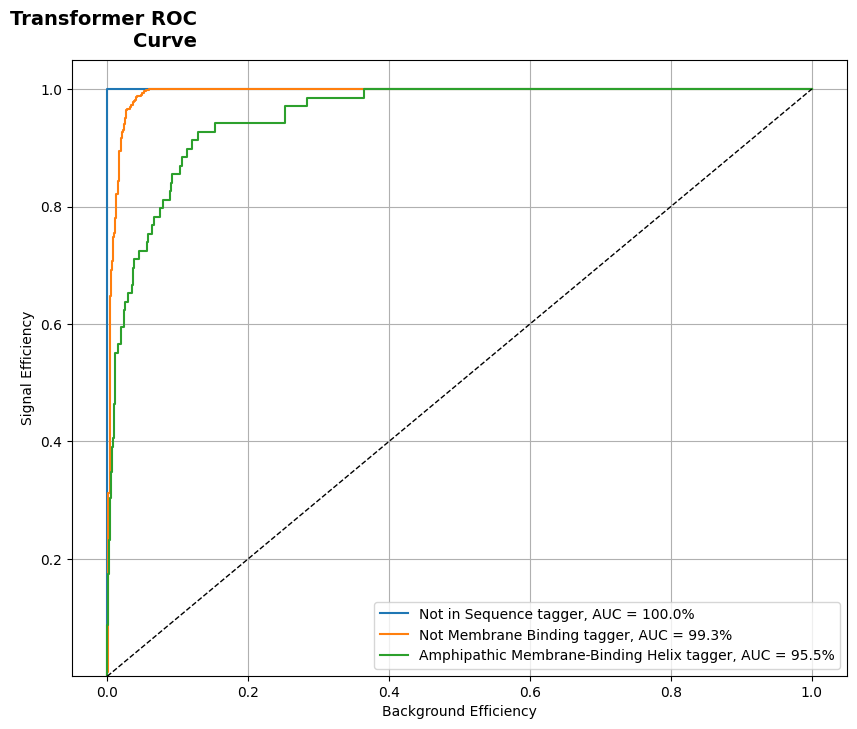

In [378]:
predictions = makeRoc(X_test,y_test,labels,model)